In [26]:
%load_ext autoreload
%autoreload 2

%cd agoro-field-boundary-detector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/lacie-life/Github/SmartAgriculture/field-boundaries-detection/collection/agoro-field-boundary-detector


In [27]:
import numpy as np
from pathlib import Path
from src.agoro_field_boundary_detector import FieldBoundaryDetector

In [28]:
# Create often-used paths
DATA = Path.cwd() / 'data'
MODELS = Path.cwd() / 'models'

In [29]:
from PIL import Image
from numpy import asarray


In [48]:
model = FieldBoundaryDetector(model_path=MODELS / 'mask_rcnn',)

# Make the prediction
image = Image.open('/home/lacie-life/Github/SmartAgriculture/field-boundaries-detection/images/test.jpg')
im = np.asarray(image)
all_polygon = model.get_all_polygons(im)


In [49]:
all_polygon

[[(633, 2256),
  (631, 2257),
  (621, 2257),
  (619, 2258),
  (616, 2258),
  (614, 2257),
  (600, 2257),
  (598, 2258),
  (595, 2258),
  (593, 2259),
  (591, 2259),
  (589, 2260),
  (587, 2260),
  (580, 2260),
  (578, 2259),
  (573, 2259),
  (571, 2258),
  (569, 2259),
  (567, 2259),
  (564, 2261),
  (562, 2262),
  (560, 2263),
  (557, 2265),
  (554, 2267),
  (554, 2269),
  (553, 2271),
  (553, 2273),
  (552, 2275),
  (552, 2277),
  (551, 2279),
  (551, 2282),
  (550, 2284),
  (550, 2287),
  (549, 2289),
  (549, 2293),
  (548, 2295),
  (548, 2297),
  (547, 2299),
  (547, 2302),
  (546, 2304),
  (546, 2315),
  (545, 2317),
  (545, 2320),
  (544, 2322),
  (544, 2325),
  (543, 2327),
  (543, 2329),
  (542, 2331),
  (541, 2333),
  (541, 2339),
  (540, 2341),
  (540, 2349),
  (539, 2351),
  (539, 2354),
  (538, 2356),
  (538, 2359),
  (537, 2361),
  (537, 2365),
  (536, 2367),
  (536, 2372),
  (535, 2374),
  (535, 2380),
  (534, 2382),
  (534, 2387),
  (533, 2389),
  (533, 2394),
  (532, 23

In [51]:
print(type(all_polygon))
print(len(all_polygon))

<class 'list'>
54


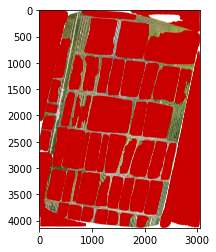

In [55]:
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

polygon = image.copy()

draw = ImageDraw.Draw(polygon)

for plg in all_polygon:
    draw.polygon((plg), fill=200)
    
polygon.save("results.jpg")

plt.imshow(polygon)
plt.show()

In [32]:
pts = np.array(single_polygon).reshape((-1, 1, 2))

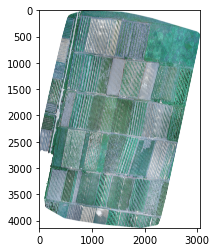

In [33]:
import cv2
from matplotlib import pyplot as plt

image_result = cv2.imread('/home/lacie-life/Github/SmartAgriculture/field-boundaries-detection/images/test.jpg')

plt.imshow(image_result)
plt.show()


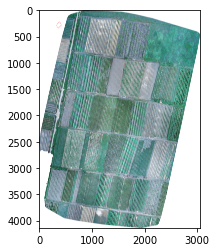

In [34]:
isClosed = True
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.polylines() method
# Draw a Blue polygon with 
# thickness of 1 px
image_result = cv2.polylines(image_result, [pts], 
                      isClosed, color, thickness)
cv2.imwrite("result.jpg", image_result)
plt.imshow(image_result)
plt.show()